### 2022年度計算機演習A・B

# 第13回レポート課題の解説

### 演習1

自然数 $a$ と $b$ に対して、パラメータ表示

$$
x(t)=\sin(a\cdot 2\pi t),\quad y(t)=\sin(b\cdot 2\pi t)\quad (0\leq t\leq 1)
$$

によって与えられる曲線を考えます。これは、**リサージュ曲線（Lissajous curve）**と呼ばれます。

自然数 $a$ と $b$ に対するリサージュ曲線を描画する関数`draw_Lissajous(a,b)`を定義した上で、$a=4, b=5$ に対してその関数を呼び出してください。ただし、滑らかな曲線を描画すること。

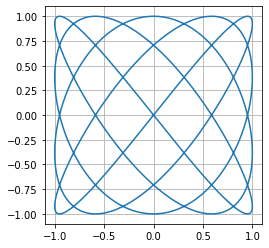

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw_Lissajous(a,b):
    t = np.linspace(0,1,1001)  #パラメータt（滑らかな曲線を描画するために、要素数（点の個数）を多くしている）
    
    x = np.sin(a*2*np.pi*t)  #tを用いたx座標の式
    y = np.sin(b*2*np.pi*t)  #tを用いたy座標の式

    plt.plot(x,y)  #曲線の描画

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

#定義した関数draw_Lissajousを呼び出す
draw_Lissajous(4,5)

### 演習2

制御点の座標を並べた行列 $P$ に対する $3$ 次ベジェ曲線を描画する関数`draw_Bezier(P)`を定義した上で、複数の $3$ 次ベジェ曲線を組み合わせて自由に図形や文字などを描画してください。

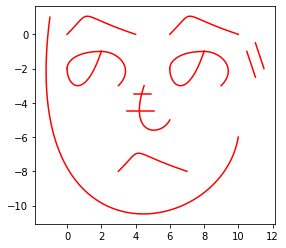

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Bernstein(i,n,t):  #i番目のn次バーンスタイン基底関数のtにおける値を返す関数
    return math.factorial(n)/(math.factorial(i)*math.factorial(n-i))*t**i*(1-t)**(n-i)

def draw_Bezier(P):
    t = np.linspace(0,1,101)  #パラメータt

    x = 0
    y = 0
    for i in range(4):  #3次ベジェ曲線のx座標とy座標の計算
        x = x+P[0,i]*Bernstein(i,3,t)
        y = y+P[1,i]*Bernstein(i,3,t)

    plt.plot(x,y,"r")  #ベジェ曲線の描画

#定義した関数draw_Bezierを呼び出して、描画を行う
draw_Bezier(np.array([[0,0],[1.6,1.6],[0.4,1.2],[4,0]]).T)  #へ

draw_Bezier(np.array([[2,-1],[1,-4],[0,-3],[0,-2]]).T)  #の
draw_Bezier(np.array([[0,-2],[0,-1.6],[0.5,-1],[2,-1]]).T)
draw_Bezier(np.array([[2,-1],[3,-1],[4,-2],[3,-3]]).T)

draw_Bezier(np.array([[6,0],[7.6,1.6],[6.4,1.2],[10,0]]).T)  #へ

draw_Bezier(np.array([[8,-1],[7,-4],[6,-3],[6,-2]]).T)  #の
draw_Bezier(np.array([[6,-2],[6,-1.6],[6.5,-1],[8,-1]]).T)
draw_Bezier(np.array([[8,-1],[9,-1],[10,-2],[9,-3]]).T)

draw_Bezier(np.array([[4.5,-3],[3.5,-6],[5.5,-6],[6,-5]]).T)  #も
draw_Bezier(np.array([[3.9,-3.5],[4.4,-3.5],[4.4,-3.5],[4.9,-3.5]]).T)
draw_Bezier(np.array([[3.5,-4.5],[4.3,-4.5],[4.3,-4.5],[5.1,-4.5]]).T)

draw_Bezier(np.array([[3,-8],[4.6,-6.4],[3.4,-6.8],[7,-8]]).T)  #へ

draw_Bezier(np.array([[-1,1],[-3,-14],[9,-12],[10,-6]]).T)  #じ
draw_Bezier(np.array([[10.5,-1],[10.75,-1.75],[10.75,-1.75],[11,-2.5]]).T)
draw_Bezier(np.array([[11,-0.5],[11.25,-1.25],[11.25,-1.25],[11.5,-2]]).T)

#plt.grid()
plt.gca().set_aspect("equal")
plt.show()

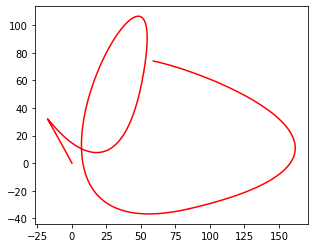

In [3]:
#乱数を使って、滑らかにつながった3つのベジェ曲線を描画する
x1 = 0
y1 = 0
x2 = np.random.randint(-100,100)  #-100以上100以下の整数を乱数で与える
y2 = np.random.randint(-100,100)
for i in range(3):
    x3 = np.random.randint(-100,100)
    y3 = np.random.randint(-100,100)
    x4 = np.random.randint(-100,100)
    y4 = np.random.randint(-100,100)
    draw_Bezier(np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]]).T)  #ベジェ曲線の描画
    x1 = x4  #終点を次の始点にする
    y1 = y4
    x2 = x4+(x4-x3)  #終点での接線の方向と次の始点での接線の方向を一致させる（接続部分を滑らかにする）
    y2 = y4+(y4-y3)

#plt.grid()
plt.gca().set_aspect("equal")
plt.show()